# Nama : Nuraisah
# Nim : 2106080
# Mata Kuliah : Pengolahan Citra Digital
❤❤❤❤❤❤❤❤❤❤❤❤ ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤
# PENERAPAN ALGORITMA CONVOLUTIONAL NEURAL NETWORK (CNN) UNTUK KLASIFIKASI JENIS KENDARAAN PADA JALAN RAYA



In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
img_height = 240
img_width = 240
batch_size = 32
data_dir = r"/content/dataset"
ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 400 files belonging to 4 classes.


In [ ]:
val_ds = ds.skip(10)
train_ds = ds.take(10)

In [ ]:
len(val_ds), len(train_ds)

(3, 10)

In [ ]:
class_names = ds.class_names
def visualize(ds):
    plt.figure(figsize=(10, 10))
    for images, labels in ds.take(1):
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

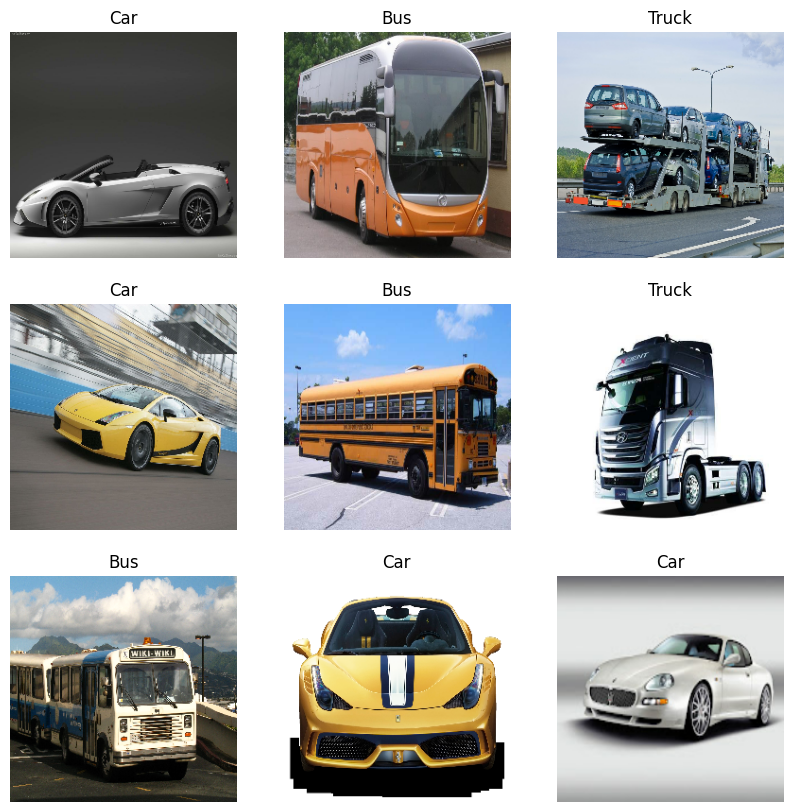

In [ ]:
visualize(val_ds)

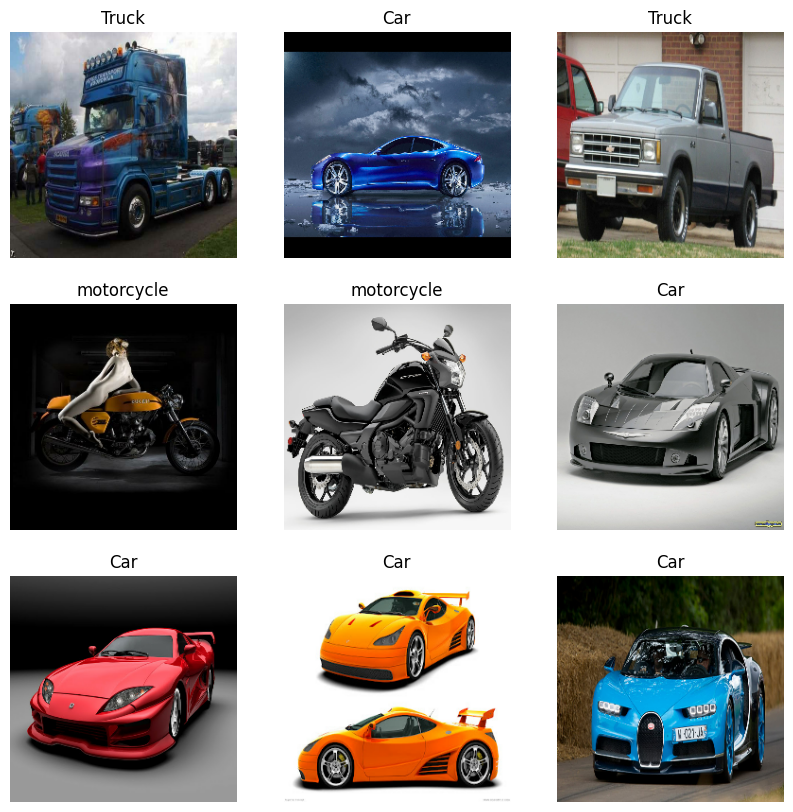

In [ ]:
visualize(train_ds)

In [ ]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, padding="same", activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding="same", activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding="same", activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(num_classes, activation = "softmax")
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=12, validation_data=val_ds)

Epoch 1/12
10/10 [==============================] - 30s 3s/step - loss: 1.4094 - accuracy: 0.3156 - val_loss: 1.3595 - val_accuracy: 0.2500
Epoch 2/12
10/10 [==============================] - 23s 2s/step - loss: 1.3017 - accuracy: 0.3375 - val_loss: 1.1753 - val_accuracy: 0.6375
Epoch 3/12
10/10 [==============================] - 23s 2s/step - loss: 1.0869 - accuracy: 0.5469 - val_loss: 0.9411 - val_accuracy: 0.6000
Epoch 4/12
10/10 [==============================] - 23s 2s/step - loss: 0.8692 - accuracy: 0.6500 - val_loss: 0.6459 - val_accuracy: 0.7750
Epoch 5/12
10/10 [==============================] - 23s 2s/step - loss: 0.6800 - accuracy: 0.7500 - val_loss: 0.4862 - val_accuracy: 0.8000
Epoch 6/12
10/10 [==============================] - 23s 2s/step - loss: 0.5013 - accuracy: 0.8375 - val_loss: 0.3607 - val_accuracy: 0.8375
Epoch 7/12
10/10 [==============================] - 23s 2s/step - loss: 0.3598 - accuracy: 0.8969 - val_loss: 0.3171 - val_accuracy: 0.9000
Epoch 8/12
10/10 [==